<a href="https://colab.research.google.com/github/Vedant2100/w26/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.

In [7]:
from datasets import load_dataset
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

dataset = load_dataset("ylecun/mnist")

def format_data(split):
    X, y = [], []
    mean = np.mean(split["image"])
    std = np.std(split["image"])
    for i in range(len(split)):
        img = np.array(split[i]["image"]).flatten()
        img = img - mean
        img = img / std
        img = np.append(img, 1)
        X.append(img)
        y_val = split[i]["label"]
        y_val = int(y_val > 4)
        y.append(y_val)
    return np.array(X), np.array(y)

Q2. Linear Classifier

In [11]:
lambda_ = 0.01
X_train, y_train = format_data(dataset["train"])
X_test, y_test = format_data(dataset["test"])
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
def minibatch_sgd(ITR, B, lr, X_train, y_train, X_test, y_test):
    W = np.random.normal(0, 1/np.sqrt(785), (1, 785))
    loss_hist, acc_hist = [], []
    start = time.time()
    N_tr = len(X_train)
    for t in tqdm(range(ITR)):
        idx = np.random.choice(N_tr, B, replace=True)
        X_b, y_b = X_train[idx], y_train[idx].reshape(-1, 1)
        y_p = X_b @ W.T
        grad = (1/B) * (y_p - y_b).T @ X_b + lambda_ * W
        W -= lr * grad
        loss = 0.5 * np.mean((y_p - y_b)**2) + (lambda_/2) * np.linalg.norm(W)**2
        loss_hist.append(loss)
        test_scores = X_test @ W.T
        test_preds = (test_scores.flatten() > 0.5).astype(int)
        acc = np.mean(test_preds == y_test)
        acc_hist.append(acc)
    return W, loss_hist, acc_hist, (time.time() - start)

Shape of y_train: (60000,)
Shape of y_test: (10000,)


100%|██████████| 50000/50000 [01:01<00:00, 809.90it/s]


lr=0.001: Time=61.74s, Accuracy=0.8560


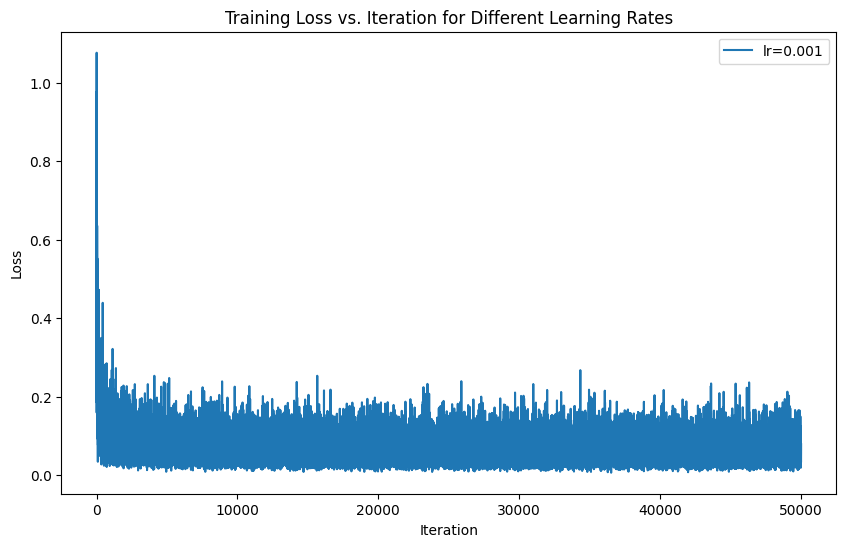

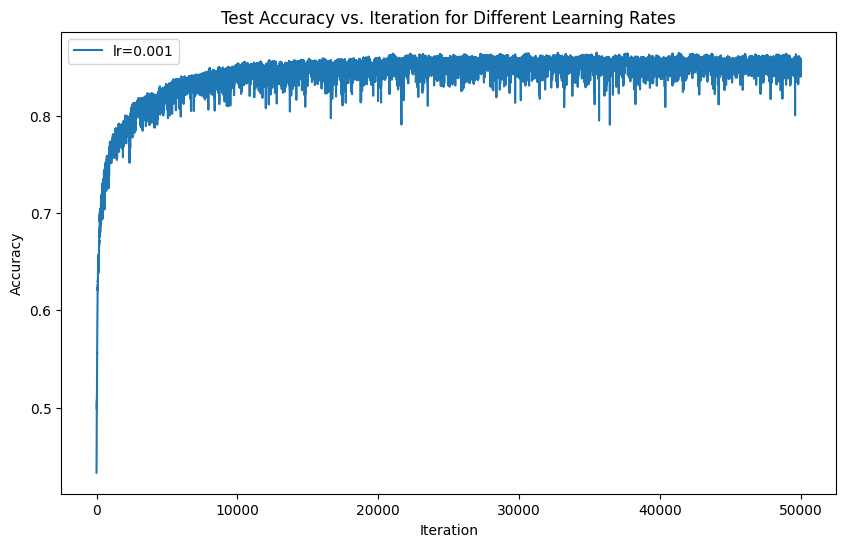

In [14]:
B = 10
lrs = [0.001]
ITR = 50000

plt.figure(figsize=(10, 6))
plt.title("Training Loss vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.figure(figsize=(10, 6))
plt.title("Test Accuracy vs. Iteration for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

loss_fig = plt.figure(1)
ax_loss = loss_fig.gca()
acc_fig = plt.figure(2)
ax_acc = acc_fig.gca()

for lr in lrs:
    _, losses, accs, dur = minibatch_sgd(ITR, B, lr, X_train, y_train, X_test, y_test)
    print(f"lr={lr}: Time={dur:.2f}s, Accuracy={accs[-1]:.4f}")

    ax_loss.plot(losses, label=f"lr={lr}")
    ax_acc.plot(accs, label=f"lr={lr}")

ax_loss.legend()
ax_acc.legend()

loss_fig.show()
acc_fig.show()

Test accuracy of the linear classifier is 0.85

Q3. Neural Network with. k = 5, 50, 200 hidden units


In [15]:
def ReLU(x):
    return np.maximum(0, x)

def minibatch_sgd_nn(ITR, B, lr, X_train, y_train, X_test, y_test, k):
    W1 = np.random.normal(0, 1/np.sqrt(785), (k, 785))
    W2 = np.random.normal(0, 1/np.sqrt(k), (1, k))
    loss_hist, acc_hist = [], []
    start = time.time()
    N_tr = len(X_train)
    for t in tqdm(range(ITR)):
        idx = np.random.choice(N_tr, B, replace=True)
        X_b, y_b = X_train[idx], y_train[idx].reshape(-1, 1)
        z = X_b @ W1.T
        a = ReLU(z)
        y_p = a @ W2.T
        grad_W2 = (1/B) * (y_p - y_b).T @ a
        grad_a = (1/B) * (y_p - y_b) @ W2
        grad_z = grad_a * (z > 0)
        grad_W1 = (1/B) * grad_z.T @ X_b
        W1 -= lr * grad_W1
        W2 -= lr * grad_W2
        loss = 0.5 * np.mean((y_p - y_b)**2) + (lambda_/2) * (np.linalg.norm(W1)**2 + np.linalg.norm(W2)**2)
        loss_hist.append(loss)
        test_scores_hidden = X_test @ W1.T
        test_scores_activated = ReLU(test_scores_hidden)
        test_scores = test_scores_activated @ W2.T

        test_preds = (test_scores.flatten() > 0.5).astype(int)
        acc = np.mean(test_preds == y_test)
        acc_hist.append(acc)

    return W1, W2, loss_hist, acc_hist, (time.time() - start)

Training Neural Network with k=5 hidden units, B=10, ITR=50000, lr=0.001


100%|██████████| 50000/50000 [03:01<00:00, 275.24it/s]


NN (k=5, lr=0.001): Time=181.66s, Final Test Accuracy=0.8341
Training Neural Network with k=50 hidden units, B=10, ITR=50000, lr=0.001


100%|██████████| 50000/50000 [06:49<00:00, 122.07it/s]


NN (k=50, lr=0.001): Time=409.60s, Final Test Accuracy=0.9051
Training Neural Network with k=200 hidden units, B=10, ITR=50000, lr=0.001


 31%|███       | 15498/50000 [05:57<13:14, 43.41it/s]


KeyboardInterrupt: 

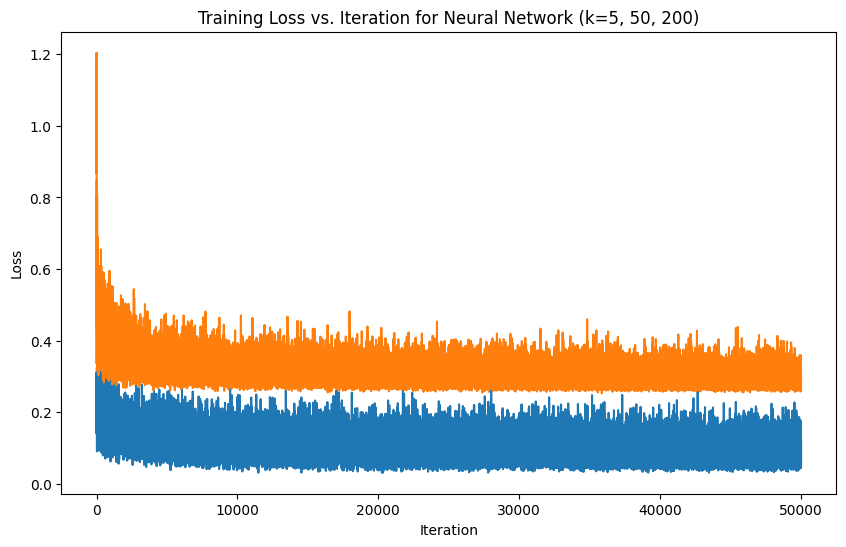

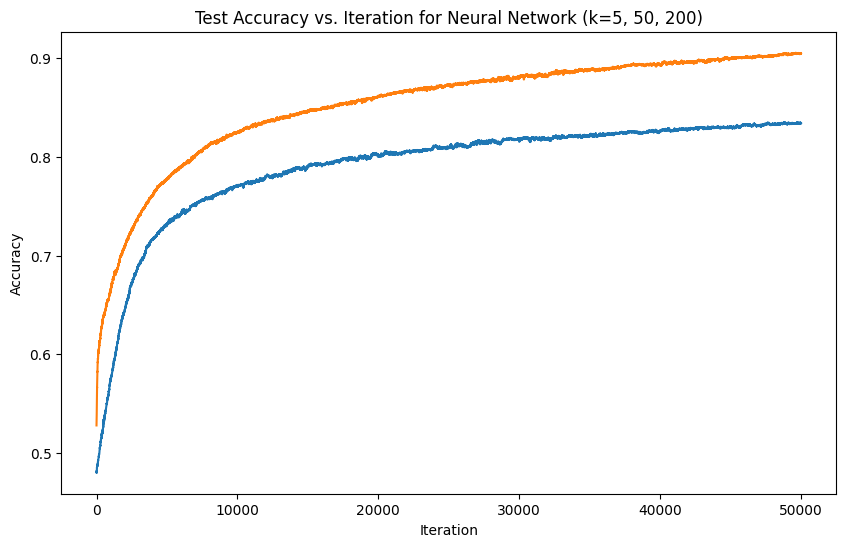

In [23]:
lr_nn = 0.001
k_values = [5, 50, 200]
results = {}

plt.figure(figsize=(10, 6))
plt.title("Training Loss vs. Iteration for Neural Network (k=5, 50, 200)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
loss_fig = plt.gca()

plt.figure(figsize=(10, 6))
plt.title("Test Accuracy vs. Iteration for Neural Network (k=5, 50, 200)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
acc_fig = plt.gca()

for k in k_values:
  print(f"Training Neural Network with k={k} hidden units, B={B}, ITR={ITR}, lr={lr_nn}")
  W1_nn, W2_nn, losses_nn, accs_nn, dur_nn = minibatch_sgd_nn(ITR, B, lr_nn, X_train, y_train, X_test, y_test, k)
  results[k] = {'losses': losses_nn, 'accs': accs_nn, 'dur': dur_nn}
  print(f"NN (k={k}, lr={lr_nn}): Time={dur_nn:.2f}s, Final Test Accuracy={accs_nn[-1]:.4f}")

  loss_fig.plot(losses_nn, label=f"NN (k={k})")
  acc_fig.plot(accs_nn, label=f"NN (k={k})")

loss_fig.legend()
acc_fig.legend()

plt.show()

Q4. Logistic Loss

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def minibatch_sgd_nn_logistic(ITR, B, lr, X_train, y_train, X_test, y_test, k):
    W1 = np.random.normal(0, 1/np.sqrt(X_train.shape[1]), (k, X_train.shape[1]))
    W2 = np.random.normal(0, 1/np.sqrt(k), (1, k))
    loss_hist, acc_hist = [], []
    start = time.time()
    N_tr = len(X_train)

    for t in tqdm(range(ITR)):
        idx = np.random.choice(N_tr, B, replace=True)
        X_b = X_train[idx]
        y_b = y_train[idx].reshape(-1, 1)
        z = X_b @ W1.T
        a = ReLU(z)
        logits = a @ W2.T
        probs = sigmoid(logits)
        delta = probs - y_b
        grad_W2 = (1/B) * delta.T @ a
        grad_a = (1/B) * delta @ W2
        grad_z = grad_a * (z > 0)
        grad_W1 = (1/B) * grad_z.T @ X_b

        W1 -= lr * grad_W1
        W2 -= lr * grad_W2
        eps = 1e-8
        loss = -np.mean(y_b * np.log(probs+eps) + (1 - y_b) * np.log(1 - probs+eps))
        loss_hist.append(loss)
        test_hidden = X_test @ W1.T
        test_act = ReLU(test_hidden)
        test_logits = test_act @ W2.T
        test_probs = sigmoid(test_logits)

        test_preds = (test_probs.flatten() > 0.5).astype(int)
        acc = np.mean(test_preds == y_test)
        acc_hist.append(acc)

    return W1, W2, loss_hist, acc_hist, (time.time() - start)


In [ ]:
lr_nn = 0.001
k_values = [5, 50, 200]
results = {}

plt.figure(figsize=(10, 6))
plt.title("Training Loss vs. Iteration for Neural Network (k=5, 50, 200)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
loss_fig = plt.gca()

plt.figure(figsize=(10, 6))
plt.title("Test Accuracy vs. Iteration for Neural Network (k=5, 50, 200)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
acc_fig = plt.gca()

for k in k_values:
  print(f"Training Neural Network with k={k} hidden units, B={B}, ITR={ITR}, lr={lr_nn}")
  W1_nn, W2_nn, losses_nn, accs_nn, dur_nn = minibatch_sgd_nn_logistic(ITR, B, lr_nn, X_train, y_train, X_test, y_test, k)
  results[k] = {'losses': losses_nn, 'accs': accs_nn, 'dur': dur_nn}
  print(f"NN (k={k}, lr={lr_nn}): Time={dur_nn:.2f}s, Final Test Accuracy={accs_nn[-1]:.4f}")

  loss_fig.plot(losses_nn, label=f"NN (k={k})")
  acc_fig.plot(accs_nn, label=f"NN (k={k})")

loss_fig.legend()
acc_fig.legend()

plt.show()